In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


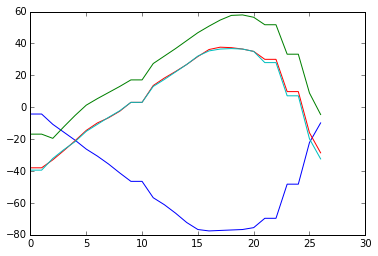

In [2]:
fulltraj = load('enlair.npy')

fulltraj = fulltraj[:, [1, 2, 4, 5]]
traj = fulltraj[415:442]

plot(traj)

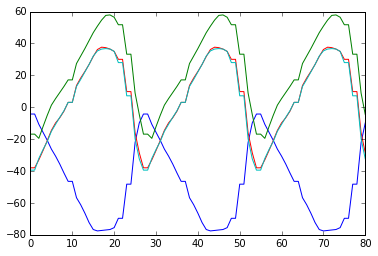

In [3]:
plot(concatenate((traj, traj, traj)))

In [4]:
from pydmps.dmp_rhythmic import DMPs_rhythmic

In [5]:
BFS = 10

In [6]:
dmp = DMPs_rhythmic(dmps=traj.shape[1], bfs=BFS)

In [7]:
reconstructed = dmp.imitate_path(traj.T).T

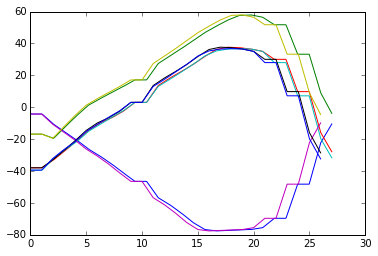

In [8]:
plot(linspace(0, len(traj), len(reconstructed)), reconstructed)
plot(traj)

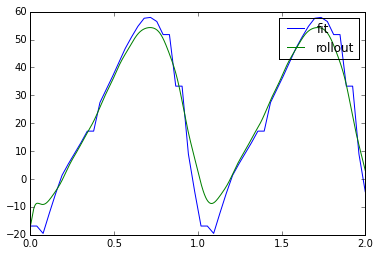

In [9]:
dmp = DMPs_rhythmic(dmps=traj.shape[1], bfs=BFS)
reconstructed = dmp.imitate_path(traj.T).T

dmp.timesteps *= 2
y, _, _ = dmp.rollout()

i = 1

plot(linspace(0, 2, 2*len(traj)), concatenate((traj[:, i], traj[:, i])))
plot(linspace(0, 2, len(y)), y[:, i])

legend(('fit', 'rollout'))

In [10]:
from __init__ import save

with open('base_dmp.json', 'w') as f:
    save(dmp, f)